## PART 1, Samuel Nicklaus

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.datasets import fetch_openml
import pickle
from scipy.special import expit
from sklearn.model_selection import train_test_split
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

## Open MNIST data and create a subset with desired digits
MNIST dataset contains 70,000 images of hand-written digits from 0 to 9. Each image has a grey-scale resolution of 28 $\times$ 28 (i.e., 784 pixels). Each pixel has an integer value ranging from 0 (bright) to 255 (dark).

<font color=red>Change the code below to select a different subset </font>

In [2]:
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)
y = np.asarray([int(numeric_string) for numeric_string in y])

# Change the conditions below to compare between other two digits.
class1Indices = (y==0)
class2Indices = (y==1)

x1 = X[class1Indices]
x2 = X[class2Indices]

Xtrain = np.concatenate((x1,x2),axis=0)
ytrain = np.concatenate((np.zeros(x1.shape[0]),np.ones(x2.shape[0])),axis=0)

# Saving the temporary variables for fast retrieval
with open('temp.pickle', 'wb') as handle:
    pickle.dump([Xtrain, ytrain], handle)



c:\Users\Samue\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


# Split the data to training, testing, and validation subsets

In [3]:
# loading the temporary variables for fast retrieval
with open('temp.pickle', 'rb') as handle:
    Xtrain, ytrain = pickle.load(handle)
    
# Split the data to training, testing, and validation subsets
    
X_train, X_test, y_train, y_test = train_test_split(Xtrain, ytrain, test_size=0.3, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.14, random_state=1) # 0.25 x 0.8 = 0.2


Nsamples = X_train.shape[0]
Nfeatures = X_train.shape[1]


# Accuracy of a classifier

In [4]:
def testLinearClassifier(a, X, y):
    X_with_bias = np.hstack((X, np.ones((X.shape[0], 1))))

    predictions = np.dot(X_with_bias, a)
    
    predictions_label = np.where(predictions >= 0, 1, 0)
    
    misclassifications = np.sum(predictions_label != y)
    
    return misclassifications


## Define and test gaussianClassifierWithIdentityCovariance 

Training error:  0.020681128470270878
Validation error:  0.017943409247757072
Test error:  0.022327469553450607


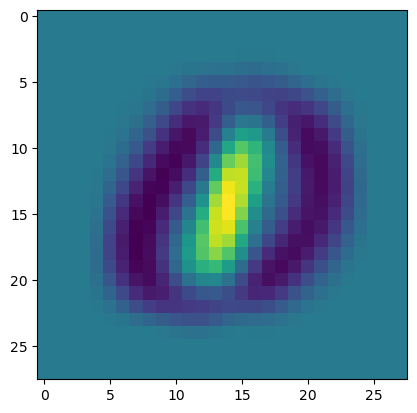

In [20]:
def gaussianClassifierWithIdentityCovariance(Xtrain, ytrain):
    biased_features = np.hstack((Xtrain, np.ones((Xtrain.shape[0], 1))))
    mu1 = np.mean(biased_features[ytrain == 0], axis=0)
    mu2 = np.mean(biased_features[ytrain == 1], axis=0)
    a = mu2 - mu1
    return a



#------SIMPLE TESTING ON THE TRAINING DATA ITSELF --------------
a = gaussianClassifierWithIdentityCovariance(X_train,y_train)
plt.imshow(np.reshape(a[0:784],(28,28)))

train = testLinearClassifier(a,X_train,y_train)
val = testLinearClassifier(a,X_val,y_val)
test = testLinearClassifier(a,X_test,y_test)
# print("Training error: ", train/Nsamples)
# print("Validation error: ", val/X_val.shape[0])
# print("Test error: ", test/X_test.shape[0])

## Define and test gaussianClassifierWithCommonCovariance 

Training error:  0.006181859053613578
Validation error:  0.010351966873706004
Test error:  0.006991429860171402


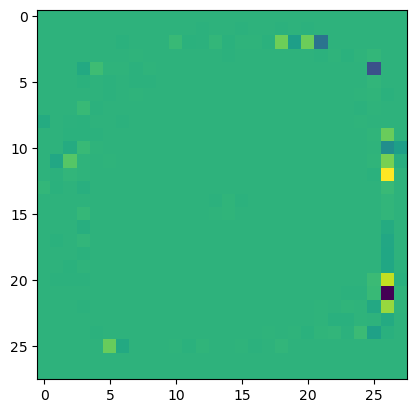

In [7]:
def gaussianClassifierWithCommonCovariance(Xtrain, ytrain):
    biased_features = np.hstack((Xtrain, np.ones((ytrain.shape[0], 1))))
    features1 = biased_features[ytrain == 1]
    features2 = biased_features[ytrain == 0]
    mu1 = np.mean(features1, axis=0)
    mu2 = np.mean(features2, axis=0)
    covariance = np.cov(biased_features.T)
    a = np.dot(np.linalg.pinv(covariance), (mu1 - mu2))
    return a

#------SIMPLE TESTING ON THE TRAINING DATA ITSELF --------------
a = gaussianClassifierWithCommonCovariance(X_train,y_train)
plt.imshow(np.reshape(a[0:784],(28,28)))

train = testLinearClassifier(a,X_train,y_train)
val = testLinearClassifier(a,X_val,y_val)
test = testLinearClassifier(a,X_test,y_test)
# print("Training error: ", train/Nsamples)
# print("Validation error: ", val/X_val.shape[0])
# print("Test error: ", test/X_test.shape[0])


## Define and test logisticRegression 

You may choose the step size as 1e-4. You can try changing it.

Use the expit() function from scipy.special.expit to implement sigmoid without overflow errors 

Training error:  0.0013487692480611442
Validation error:  0.0
Test error:  0.0011276499774470004


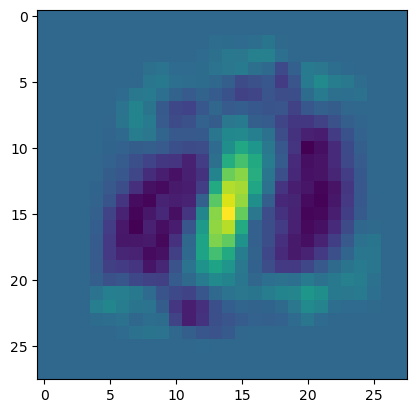

In [13]:
def logisticRegression(Xtrain,ytrain,iterations=100,step_size=1e-4,verbose=False):
    biased_features = np.hstack((Xtrain, np.ones((Xtrain.shape[0], 1))))
    weights = 0.01 * np.random.randn(biased_features.shape[1])
    for _ in range(iterations):
        dot = np.dot(biased_features, weights)
        predictions = expit(dot)
        error = predictions - ytrain
        gradient = np.dot(biased_features.T, error)
        weights -= step_size * gradient
    return weights
    
#------SIMPLE TESTING ON THE TRAINING DATA ITSELF --------------
a = logisticRegression(X_train,y_train,iterations=500,verbose=False)
plt.imshow(np.reshape(a[0:784],(28,28)))

train = testLinearClassifier(a,X_train,y_train)
val = testLinearClassifier(a,X_val,y_val)
test = testLinearClassifier(a,X_test,y_test)
# print("Training error: ", train/Nsamples)
# print("Validation error: ", val/X_val.shape[0])
# print("Test error: ", test/X_test.shape[0])

Training error:  0.0008991794987074295
Validation error:  0.0
Test error:  0.0011276499774470004


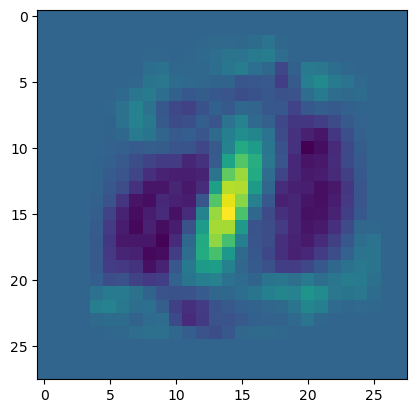

In [16]:
def logisticRegressionWithRegularization(Xtrain,ytrain,iterations=100,step_size=1e-4,lam=0,verbose=False):
    biased_features = np.hstack((Xtrain, np.ones((Xtrain.shape[0], 1))))
    weights = 0.01 * np.random.randn(biased_features.shape[1])
    for _ in range(iterations):
        dot = np.dot(biased_features, weights)
        predictions = expit(dot)
        error = predictions - ytrain
        gradient = np.dot(biased_features.T, error) + 2 * lam * weights # Only line that changes
        weights -= step_size * gradient
    return weights

#------SIMPLE TESTING ON THE TRAINING DATA ITSELF --------------
a = logisticRegressionWithRegularization(X_train,y_train,iterations=500,verbose=False,lam=1)
plt.imshow(np.reshape(a[0:784],(28,28)))

train = testLinearClassifier(a,X_train,y_train)
val = testLinearClassifier(a,X_val,y_val)
test = testLinearClassifier(a,X_test,y_test)
# print("Training error: ", train/Nsamples)
# print("Validation error: ", val/X_val.shape[0])
# print("Test error: ", test/X_test.shape[0])


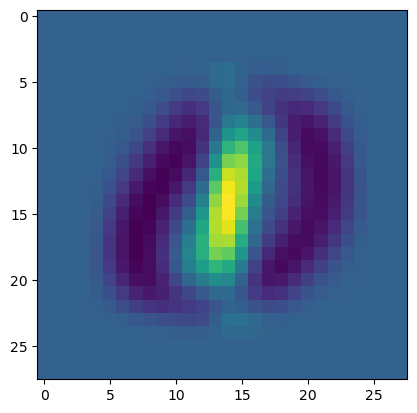

In [18]:
def optimizeHyperparameters(Xtrain,ytrain):
    lam = np.linspace(0, 100, num=100)
    missclass = []
    for l in lam:
        weights = logisticRegressionWithRegularization(X_train,y_train,iterations=500,verbose=False,lam=l)
        missclass.append(testLinearClassifier(weights,Xtrain,ytrain))
    lamopt = lam[np.argmin(missclass)]
    return lamopt

optimal_lam = optimizeHyperparameters(X_val,y_val)
optimal_weights = logisticRegressionWithRegularization(X_train,y_train,iterations=500,lam=optimal_lam)
plt.imshow(np.reshape(optimal_weights[:-1],(28,28)))

train = testLinearClassifier(optimal_weights,X_train,y_train)
val = testLinearClassifier(optimal_weights,X_val,y_val)
test = testLinearClassifier(optimal_weights,X_test,y_test)


# REPORT TEST ERRORS OF THE BEST MODELS

YOUR CODE BELOW

In [23]:
print("gaussianClassifierWithIdentityCovariance Results:")
weights = gaussianClassifierWithIdentityCovariance(X_train,y_train)
train = testLinearClassifier(weights,X_train,y_train)
val = testLinearClassifier(weights,X_val,y_val)
test = testLinearClassifier(weights,X_test,y_test)
print(f"Training error: {train}/{X_train.shape[0]} = {train/X_train.shape[0] * 100:.2f}%")
print(f"Validation error: {val}/{X_train.shape[0]} = {val/X_val.shape[0] * 100:.2f}%")
print(f"Test error: {test}/{X_train.shape[0]} = {test/X_test.shape[0] * 100:.2f}%\r\n")

print("gaussianClassifierWithCommonCovariance Results:")
weights = gaussianClassifierWithCommonCovariance(X_train,y_train)
train = testLinearClassifier(weights,X_train,y_train)
val = testLinearClassifier(weights,X_val,y_val)
test = testLinearClassifier(weights,X_test,y_test)
print(f"Training error: {train}/{X_train.shape[0]} = {train/X_train.shape[0] * 100:.2f}%")
print(f"Validation error: {val}/{X_train.shape[0]} = {val/X_val.shape[0] * 100:.2f}%")
print(f"Test error: {test}/{X_train.shape[0]} = {test/X_test.shape[0] * 100:.2f}%\r\n")

print("logisticRegression Results:")
weights = logisticRegression(X_train,y_train, iterations=500, step_size=1e-4)
train = testLinearClassifier(weights,X_train,y_train)
val = testLinearClassifier(weights,X_val,y_val)
test = testLinearClassifier(weights,X_test,y_test)
print(f"Training error: {train}/{X_train.shape[0]} = {train/X_train.shape[0] * 100:.2f}%")
print(f"Validation error: {val}/{X_train.shape[0]} = {val/X_val.shape[0] * 100:.2f}%")
print(f"Test error: {test}/{X_train.shape[0]} = {test/X_test.shape[0] * 100:.2f}%\r\n")

print("logisticRegressionWithRegularization Results:")
weights = logisticRegressionWithRegularization(X_train,y_train, iterations=500, step_size=1e-4, lam=1)
train = testLinearClassifier(weights,X_train,y_train)
val = testLinearClassifier(weights,X_val,y_val)
test = testLinearClassifier(weights,X_test,y_test)

print(f"Training error: {train}/{X_train.shape[0]} = {train/X_train.shape[0] * 100:.2f}%")
print(f"Validation error: {val}/{X_train.shape[0]} = {val/X_val.shape[0] * 100:.2f}%")
print(f"Test error: {test}/{X_train.shape[0]} = {test/X_test.shape[0] * 100:.2f}%\r\n")

print("logisticRegressionWithRegularization + optimizeHyperparameters Results:")
optimal_lam = optimizeHyperparameters(X_val,y_val)
weights = logisticRegressionWithRegularization(X_train,y_train,iterations=500,lam=optimal_lam)
train = testLinearClassifier(weights,X_train,y_train)
val = testLinearClassifier(weights,X_val,y_val)
test = testLinearClassifier(weights,X_test,y_test)

print(f"Training error: {train}/{X_train.shape[0]} = {train/X_train.shape[0] * 100:.2f}%")
print(f"Validation error: {val}/{X_train.shape[0]} = {val/X_val.shape[0] * 100:.2f}%")
print(f"Test error: {test}/{X_train.shape[0]} = {test/X_test.shape[0] * 100:.2f}%\r\n")


gaussianClassifierWithIdentityCovariance Results:
Training error: 184/8897 = 2.07%
Validation error: 26/8897 = 1.79%
Test error: 99/8897 = 2.23%

Gaussian Classifier with Common Covariance Results:
Training error: 55/8897 = 0.62%
Validation error: 15/8897 = 1.04%
Test error: 31/8897 = 0.70%

Logistic Regression Results:
Training error: 8/8897 = 0.09%
Validation error: 0/8897 = 0.00%
Test error: 4/8897 = 0.09%

Logitic Regression with Regularization Results:


KeyboardInterrupt: 